In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud


pd.set_option('display.max_colwidth', None)
df = pd.read_csv('../data/raw/restaurant_reviews.csv')
df = df[['Review','Rating']]


## data cleaning

In [15]:
df = df.dropna(subset=["Rating"])
df = df[df["Rating"].apply(lambda x: str(x).isdigit())]
df["Rating"] = df["Rating"].astype(int)


def map_sentiment(r):
    if r > 3:
        return "positive"
    elif r < 3:
        return "negative"
    else:
        return "neutral"


df["Sentiment"] = df["Rating"].apply(map_sentiment)


C:\Users\kavin\AppData\Local\Temp\ipykernel_20864\3940733240.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sentiment", data=df, palette="coolwarm")


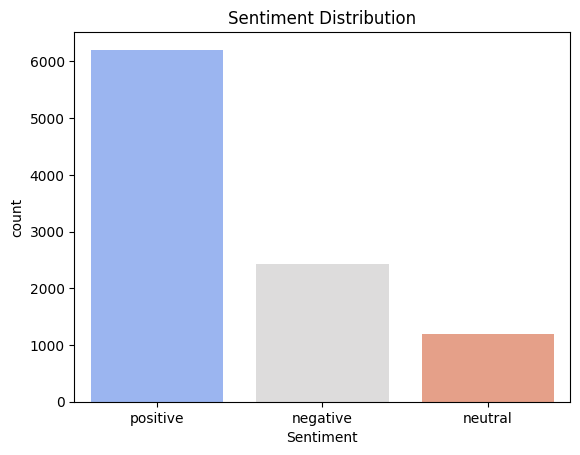

Sentiment
positive    0.632067
negative    0.246409
neutral     0.121524
Name: proportion, dtype: float64

In [17]:
sns.countplot(x="Sentiment", data=df, palette="coolwarm")
plt.title("Sentiment Distribution")
plt.show()

df["Sentiment"].value_counts(normalize=True)
